In [ ]:
import pandas as pd 
import numpy as np
import sklearn

In [ ]:
data = pd.read_csv("heart failure classification dataset.csv") 

In [ ]:
data.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1


In [ ]:
data[['serum_sodium']].head()

,serum_sodium
0,NaN
1,136.0
2,129.0
3,137.0
4,116.0


In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(data[['serum_sodium']])
data['serum_sodium'] = impute.transform(data[['serum_sodium']])

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(data[['time']])
data['time'] = impute.transform(data[['time']])

In [ ]:
data[['serum_sodium']].head()

,serum_sodium
0,136.675768
1,136.000000
2,129.000000
3,137.000000
4,116.000000


In [ ]:
data.shape

(299, 14)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['gender'] = enc.fit_transform(data['sex'])
print(data[['sex','gender']].head())



      sex  gender
0    Male       1
1    Male       1
2    Male       1
3    Male       1
4  Female       0


In [ ]:
data['smoker'] = enc.fit_transform(data['smoking'])
print(data[['smoker','smoking']].head())

   smoker smoking
0       0      No
1       0      No
2       1     Yes
3       0      No
4       0      No


In [ ]:
data = data.drop(['sex','smoking'], axis = 1)


In [ ]:
data.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT,gender,smoker
0,0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,4.0,1,1,0
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,6.0,1,1,0
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,7.0,1,1,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,7.0,1,1,0
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,8.0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(239, 13)
(60, 13)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score_LRC=accuracy_score(y_pred,y_test)
print(score_LRC)

0.8


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score_DTC=accuracy_score(y_pred,y_test)
print(score_DTC)

0.6833333333333333


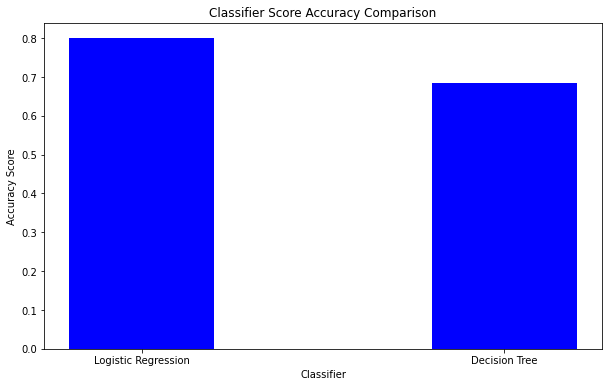

In [ ]:
data = {'Logistic Regression':score_LRC, 'Decision Tree':score_DTC} 
classifiers = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 6)) 
  
# creating the bar plot 
plt.bar(classifiers, values, color ='blue',  
        width = 0.4) 
  
plt.xlabel("Classifier") 
plt.ylabel("Accuracy Score") 
plt.title("Classifier Score Accuracy Comparison") 
plt.show() 